In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from keras.models import Sequential
from keras import layers
from keras.layers import Embedding

import seaborn as sns
sns.set(style = 'whitegrid')

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers

In [2]:
df = pd.read_csv('../Cleaning/Clean_Dataset.csv', encoding='UTF-8')
df2 = pd.read_csv('../Additional_Dataset.csv', encoding='UTF-8')

In [3]:
'''
print(df1.shape)
print(df2.shape)
'''

'\nprint(df1.shape)\nprint(df2.shape)\n'

In [4]:
#f = df.append(df2, ignore_index=True)

In [5]:
#df.to_csv('../Cleaning/Combine_Dataset.csv')

In [6]:
df.shape

(42403, 18)

In [7]:
train = df[['Clean_Text', 'indonlp_sentiment']]

#### Data Preprocessing

In [8]:
data = df['Clean_Text'].values.tolist()

In [9]:
print(data[:5])

['cina dan as terus bersaing mengembangkan teknologi terbaru termasuk kali ini perusahaan di kedua negara berlomba lomba membangun dunia virtual atau metaverse', 'katanya mau metaverse tapi down melulu bagaimana mas zuck', 'mungkin facebook sudah berencana menjadi metaverse besar secara sudah menyiapkan diem sebagai stable curency mereka kalau emang iya pasti nanti pindah ke blokchain semua facebook masih menang banyak karena hanya memerlukan pembaruan teknologi penggunanya sudah banyak', 'bersaing dengan perusahaan kelas dunia untuk mencapai hal ini sektor publik dan swasta harus bersatu untuk membentuk ekosistem metaverse yang melibatkan teknologi ar vr dan xr dalam forum tersebut juga dibahas bagaimana mensukseskan platform ini dengan pasar konsumen', 'metaverse belum diadaptasi masif masih terus dikembangkan nyatanya hari ini kita kadang sudah bingung ujung pangkal dari persinggugangan realita empiris dan realita artifisial waw']


### Building a Model

#### Tokenizing and Adding Padding

In [10]:
max_words = 50000
max_len = 10

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[    2  1118    93 ...    30    44     1]
 [    0   179    24 ...    62   220  1547]
 [  387    47    54 ...  1596    10    47]
 ...
 [    0     0     0 ...  2032    42  3087]
 [   53    19 10641 ...  1951   735 15686]
 [  308   221    97 ...   199     2   638]]


In [11]:
tweets

array([[    2,  1118,    93, ...,    30,    44,     1],
       [    0,   179,    24, ...,    62,   220,  1547],
       [  387,    47,    54, ...,  1596,    10,    47],
       ...,
       [    0,     0,     0, ...,  2032,    42,  3087],
       [   53,    19, 10641, ...,  1951,   735, 15686],
       [  308,   221,    97, ...,   199,     2,   638]])

#### Label Encoding of Output

In [12]:
import tensorflow as tf
labels = np.array(train['indonlp_sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [13]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33922, 10) (33922, 3)
(8481, 10) (8481, 3)


#### Using BiDirectional and LSTM

In [14]:
model = Sequential()
model.add(layers.Embedding(max_words, 40, input_length=max_len))
model.add(layers.BatchNormalization())
model.add(layers.Bidirectional(layers.LSTM(15,dropout=0.6)))
model.add(layers.Dense(3,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

#### Train the Model

In [15]:
history2 = model.fit(tweets, labels, epochs=20,validation_split=0.2)

Epoch 1/20
1061/1061 [==============================] - 51s 30ms/step - loss: 0.7844 - accuracy: 0.6523 - val_loss: 0.6879 - val_accuracy: 0.7366
Epoch 2/20
1061/1061 [==============================] - 27s 25ms/step - loss: 0.6593 - accuracy: 0.7230 - val_loss: 0.6604 - val_accuracy: 0.7384
Epoch 3/20
1061/1061 [==============================] - 28s 26ms/step - loss: 0.6059 - accuracy: 0.7500 - val_loss: 0.6662 - val_accuracy: 0.7448
Epoch 4/20
1061/1061 [==============================] - 27s 25ms/step - loss: 0.5697 - accuracy: 0.7693 - val_loss: 0.6789 - val_accuracy: 0.7448
Epoch 5/20
1061/1061 [==============================] - 28s 27ms/step - loss: 0.5338 - accuracy: 0.7854 - val_loss: 0.6906 - val_accuracy: 0.7389
Epoch 6/20
1061/1061 [==============================] - 27s 25ms/step - loss: 0.5056 - accuracy: 0.8016 - val_loss: 0.7277 - val_accuracy: 0.7414
Epoch 7/20
1061/1061 [==============================] - 24s 22ms/step - loss: 0.4799 - accuracy: 0.8127 - val_loss: 0.7363 -

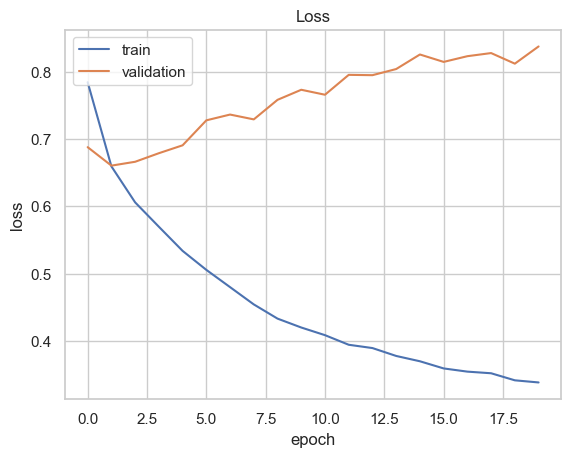

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

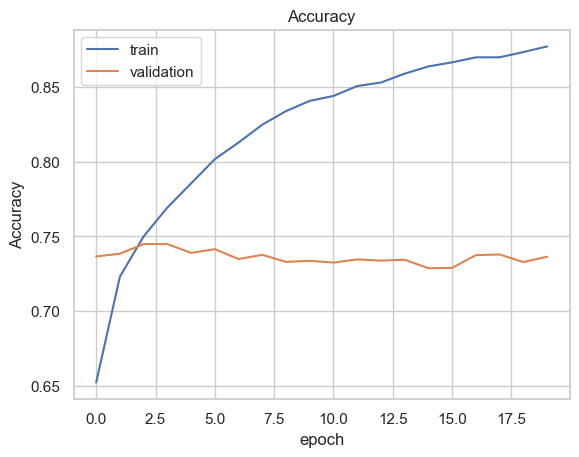

In [17]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

266/266 [==============================] - 4s 5ms/step
Model Accuracy on Test Data: 0.8665251739181701


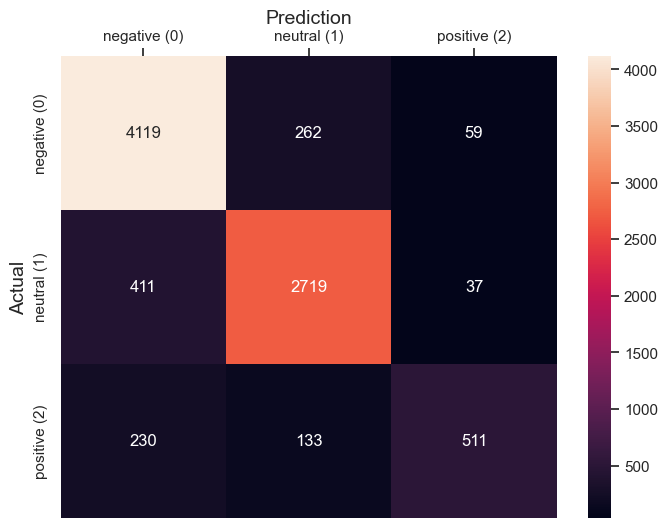

In [18]:
# Predict sentiment on data test by using model has been created, and then visualize a confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true, y_pred)
print('Model Accuracy on Test Data:', accuracy)
confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true=y_true, y_pred=y_pred), fmt='g', annot=True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_xticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
ax.set_ylabel('Actual', fontsize=14)
ax.set_yticklabels(['negative (0)', 'neutral (1)', 'positive (2)'])
plt.show()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# predict classes for test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# convert one-hot encoded true labels to integer class labels
y_test_int = np.argmax(y_test, axis=1)

# calculate metrics
print(classification_report(y_test_int, y_pred))

# calculate confusion matrix
conf_mat = confusion_matrix(y_test_int, y_pred)
print(conf_mat)


266/266 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4440
           1       0.87      0.86      0.87      3167
           2       0.84      0.58      0.69       874

    accuracy                           0.87      8481
   macro avg       0.86      0.79      0.82      8481
weighted avg       0.87      0.87      0.86      8481

[[4119  262   59]
 [ 411 2719   37]
 [ 230  133  511]]


#### Prediction and Result

In [20]:
sentiment = ['Neutral', 'Negative', 'Positive']

In [21]:
sequence = tokenizer.texts_to_sequences(['aku benci metaverse'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 54ms/step


'Negative'

In [22]:
sequence = tokenizer.texts_to_sequences(['itu kategori metaverse ya yang menang lalisa takes over vmas'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 49ms/step


'Negative'

In [23]:
sequence = tokenizer.texts_to_sequences(['teknologi yang sangat menjanjikan'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 50ms/step


'Positive'